In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from diff_ev import ClusterDifferentialEvolution
import re
from IPython.display import clear_output

In [2]:
df = pd.read_csv('experiments\DIPL_3.csv')

def to_np(x):
    x = x.to_list()
    res = []
    for i in x:
        numbers = re.findall(r'\d+\.\d+', i)
        array = np.array([float(num) for num in numbers])
        res.append(array)
    return np.array(res)

score = []
T = to_np(df['T'])
target_distance = to_np(df['target_distance'])
dead = to_np(df['dead'])
convexity = to_np(df['convexity'])
for i in range(len(T)):
    score.append(ClusterDifferentialEvolution.score(T[i], target_distance[i], dead[i], convexity[i]))


df['score'] = score
clear_output()

In [5]:
df2 = pd.read_csv('experiments/PRE_FINAL_NO_CONV_NO_GYR_7.csv')

def to_np(x):
    x = x.to_list()
    res = []
    for i in x:
        numbers = re.findall(r'\d+\.\d+', i)
        array = np.array([float(num) for num in numbers])
        res.append(array)
    return np.array(res)

score = []
T = to_np(df2['T'])
target_distance = to_np(df2['target_distance'])
dead = to_np(df2['dead'])
convexity = to_np(df2['convexity'])
for i in range(len(T)):
    score.append(ClusterDifferentialEvolution.score(T[i], target_distance[i], dead[i], convexity[i]))


df2['score'] = score
clear_output()

In [3]:
generations_mean = []
generations_min = []
n = len(df['generation'].drop_duplicates())
for i in range(-1, n - 1):
    generation = df.loc[lambda x: x['generation'] == i]
    T = to_np(generation['T'])
    target_distance = to_np(generation['target_distance'])
    dead = to_np(generation['dead'])
    convexity = to_np(generation['convexity'])
    score = generation['score'].to_numpy()
    mean = {'T': np.mean(T), 'target_distance': np.mean(target_distance), 'dead': np.mean(dead), 'convexity': np.mean(convexity), 'score': np.mean(score)}
    min_ = {'T': np.min(np.mean(T, axis=1)), 'target_distance': np.min(np.mean(target_distance, axis=1)), 'dead': np.min(np.mean(dead, axis=1)), 'convexity': np.min(np.mean(convexity, axis=1)), 'score': np.min(score)}
    generations_mean.append(mean)
    generations_min.append(min_)

In [7]:
generations_mean2 = []
generations_min2 = []
n2 = len(df2['generation'].drop_duplicates())
for i in range(-1, n2 - 1):
    generation = df2.loc[lambda x: x['generation'] == i]
    T = to_np(generation['T'])
    target_distance = to_np(generation['target_distance'])
    dead = to_np(generation['dead'])
    convexity = to_np(generation['convexity'])
    score = generation['score'].to_numpy()
    mean = {'T': np.mean(T), 'target_distance': np.mean(target_distance), 'dead': np.mean(dead), 'convexity': np.mean(convexity), 'score': np.mean(score)}
    min_ = {'T': np.min(np.mean(T, axis=1)), 'target_distance': np.min(np.mean(target_distance, axis=1)), 'dead': np.min(np.mean(dead, axis=1)), 'convexity': np.min(np.mean(convexity, axis=1)), 'score': np.min(score)}
    generations_mean2.append(mean)
    generations_min2.append(min_)

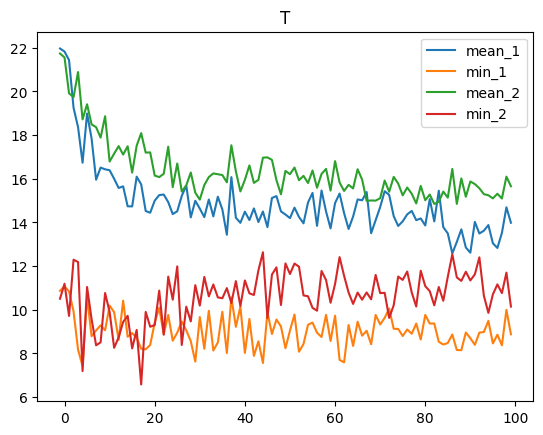

In [7]:
T_mean = [generations['T'] for generations in generations_mean]
T_min = [generations['T'] for generations in generations_min]
#T_mean2 = [generations['T'] for generations in generations_mean2]
#T_min2 = [generations['T'] for generations in generations_min2]

plt.plot(range(-1, n - 1), T_mean, label='mean_1')
plt.plot(range(-1, n - 1), T_min, label='min_1')
plt.plot(range(-1, n2 - 1), T_mean2, label='mean_2')
plt.plot(range(-1, n2 - 1), T_min2, label='min_2')
plt.title('T')
plt.legend()
plt.show()

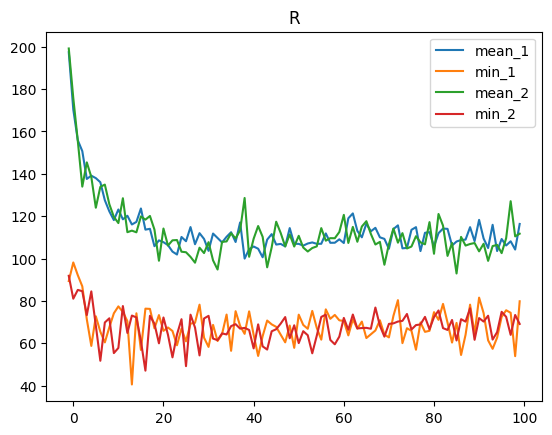

In [8]:
T_mean = [generations['target_distance'] for generations in generations_mean]
T_min = [generations['target_distance'] for generations in generations_min]
T_mean2 = [generations['target_distance'] for generations in generations_mean2]
T_min2 = [generations['target_distance'] for generations in generations_min2]

plt.plot(range(-1, n - 1), T_mean, label='mean_1')
plt.plot(range(-1, n - 1), T_min, label='min_1')
plt.plot(range(-1, n2 - 1), T_mean2, label='mean_2')
plt.plot(range(-1, n2 - 1), T_min2, label='min_2')
plt.title('R')
plt.legend()
plt.show()

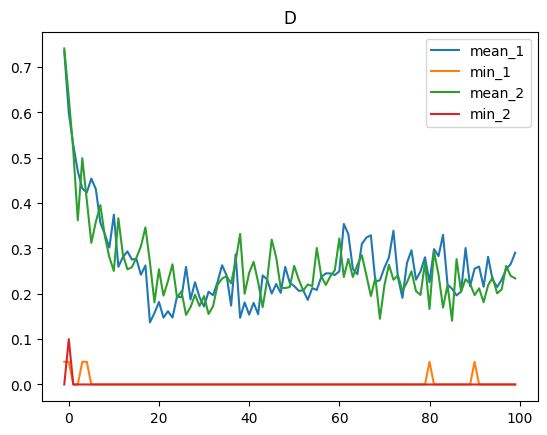

In [9]:
T_mean = [generations['dead'] for generations in generations_mean]
T_min = [generations['dead'] for generations in generations_min]
T_mean2 = [generations['dead'] for generations in generations_mean2]
T_min2 = [generations['dead'] for generations in generations_min2]

plt.plot(range(-1, n - 1), T_mean, label='mean_1')
plt.plot(range(-1, n - 1), T_min, label='min_1')
plt.plot(range(-1, n2 - 1), T_mean2, label='mean_2')
plt.plot(range(-1, n2 - 1), T_min2, label='min_2')
plt.title('D')
plt.legend()
plt.show()

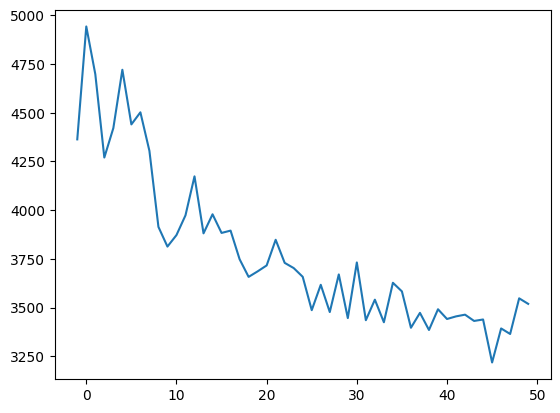

In [9]:
T_mean = [generations['score'] for generations in generations_mean]
T_min = [generations['score'] for generations in generations_min]
#T_mean2 = [generations['score'] for generations in generations_mean2]
#T_min2 = [generations['score'] for generations in generations_min2]

#plt.plot(range(-1, n - 1), T_mean, label='Среднее значение по популяции')
plt.plot(range(-1, n - 1), T_min, label='Минимально значение в популяции')
#plt.plot(range(-1, n2 - 1), T_mean2, label='mean_2')
#plt.plot(range(-1, n2 - 1), T_min2, label='min_2')
#plt.title('J')
#plt.legend()
plt.show()

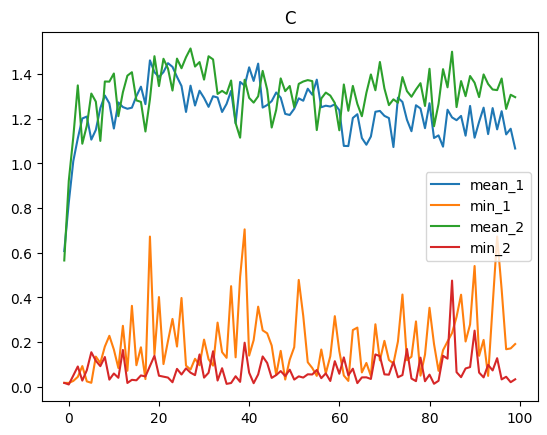

In [11]:
T_mean = [generations['convexity'] for generations in generations_mean]
T_min = [generations['convexity'] for generations in generations_min]
T_mean2 = [generations['convexity'] for generations in generations_mean2]
T_min2 = [generations['convexity'] for generations in generations_min2]

plt.plot(range(-1, n - 1), T_mean, label='mean_1')
plt.plot(range(-1, n - 1), T_min, label='min_1')
plt.plot(range(-1, n2 - 1), T_mean2, label='mean_2')
plt.plot(range(-1, n2 - 1), T_min2, label='min_2')
plt.title('C')
plt.legend()
plt.show()